In [1]:
import numpy as np
import pandas as pd 
import os
print(os.listdir("../input"))

['resources.csv', 'train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
school_states = data[['school_state','project_is_approved']]

In [4]:
school_states_approved = school_states[school_states['project_is_approved'] == 1].drop('project_is_approved',axis=1)
school_states_rejected = school_states[school_states['project_is_approved'] == 0].drop('project_is_approved',axis=1)

In [5]:
school_states_approved_counts = school_states_approved.groupby('school_state').size()
school_states_rejected_counts = school_states_rejected.groupby('school_state').size()

In [6]:
import matplotlib.pyplot as plt

In [7]:
school_states_approved_counts = school_states_approved_counts.sort_values(ascending=False)
school_states_rejected_counts = school_states_rejected_counts.sort_values(ascending=False)

Here are the top 10 biggest winners and losers in obtaining approval. Note that these numbers aren't normalized to anything yet. It might be good to divide the approved counts by the total counts to see what the rate is per state. A procedure like that should make sense, as it seems like California is the biggest winner and loser in the absolute number of approvals.

In [8]:
school_states_approved_counts.head(10)

school_state
CA    22006
NY    10377
TX    10036
FL     8541
NC     7223
IL     6260
SC     5590
GA     5535
MI     4496
PA     4342
dtype: int64

In [9]:
school_states_rejected_counts.head(10)

school_state
CA    3689
TX    2268
FL    1818
NY    1780
NC    1240
GA    1101
IL    1072
SC     873
MI     828
PA     751
dtype: int64

In [10]:
school_states_approved_counts = school_states_approved_counts.sort_index(ascending=False)
school_states_rejected_counts = school_states_rejected_counts.sort_index(ascending=False)

In [11]:
school_states_approved_probability = school_states_approved_counts / (school_states_approved_counts + school_states_rejected_counts)

In [12]:
school_states_approved_probability = school_states_approved_probability.sort_values(ascending=False)

(0.8, 0.925)

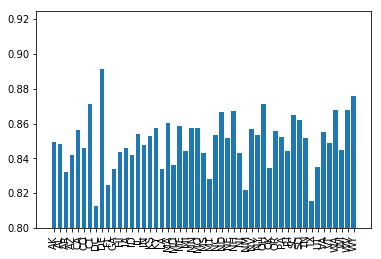

In [16]:
plt.bar(school_states_approved_probability.index, school_states_approved_probability);
plt.xticks(rotation='vertical');
plt.ylim((.8,.925))

Here are the top 10 winners for project approval. Could be improved by using error bars to determine how if the outliers are truly far from the average or if it could be explained via noise.

In [19]:
school_states_approved_probability.head(10)

school_state
DE    0.891341
WY    0.875706
OH    0.871467
CT    0.871294
WA    0.868050
WV    0.867700
NH    0.867121
ND    0.866935
SC    0.864923
SD    0.862348
dtype: float64

Here are the least favorable states to be in for project approval.

In [20]:
school_states_approved_probability.tail(10)

school_state
UT    0.835110
OK    0.834422
GA    0.834087
LA    0.834009
AR    0.832100
MT    0.828125
FL    0.824500
NM    0.822052
TX    0.815670
DC    0.812639
dtype: float64

One could imagine making a feature that encodes whether or not you're in a top 10/bottom 10 state for project approval.